In [4]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
# Cell 2: Load the dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Dataset loaded successfully!
Shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Cell 3: Check basic info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.


Target Variable Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64


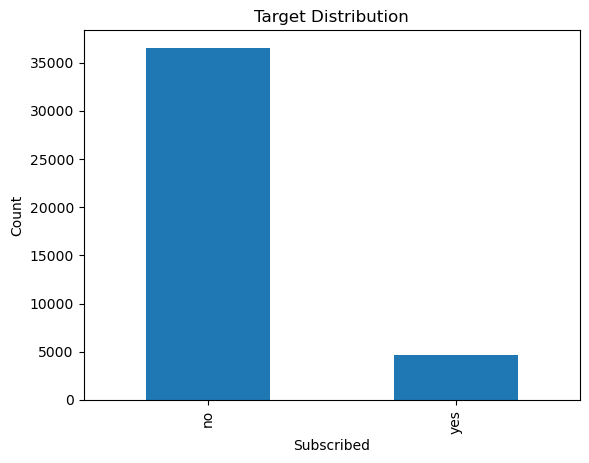

In [7]:
# Cell 4: Check target variable distribution
print("\nTarget Variable Distribution:")
print(df['y'].value_counts())
df['y'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()


In [8]:
# Cell 5: Check for missing values
print("Missing values:")
print(df.isnull().sum().sum())


Missing values:
0


In [9]:
# Cell 6: Prepare the data
# Separate features and target
X = df.drop('y', axis=1)
y = df['y']
# Convert target to numeric (yes=1, no=0)
y = y.map({'yes': 1, 'no': 0})
print("Target converted to numeric")

Target converted to numeric


In [10]:
# Cell 7: Handle categorical variables
# Get categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {len(categorical_cols)}")
print(list(categorical_cols))

# Encode categorical variables
X_encoded = X.copy()
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])

print("\nCategorical variables encoded!")
X_encoded.head()


Categorical columns: 10
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

Categorical variables encoded!


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [11]:
# Cell 8: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, 
                                                      test_size=0.2, 
                                                      random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 32950
Test set size: 8238


In [12]:
# Cell 9: Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
print("Model trained!")

Model trained!


In [13]:
# Cell 10: Make predictions
y_pred = dt_model.predict(X_test)
print("Predictions made!")


Predictions made!


In [14]:
# Cell 11: Check accuracy
train_acc = accuracy_score(y_train, dt_model.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9175
Testing Accuracy: 0.9149



Confusion Matrix:
[[7035  268]
 [ 433  502]]


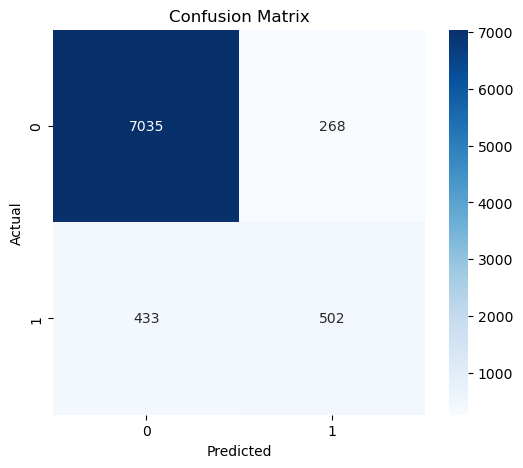

In [15]:
# Cell 12: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [16]:
# Cell 13: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.54      0.59       935

    accuracy                           0.91      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



In [17]:
# Cell 14: Feature Importance
feature_imp = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_imp.head(10))



Top 10 Important Features:
           feature  importance
10        duration    0.494374
19     nr.employed    0.359908
12           pdays    0.040013
18       euribor3m    0.034857
17   cons.conf.idx    0.033738
8            month    0.013966
9      day_of_week    0.011307
16  cons.price.idx    0.006807
7          contact    0.002119
15    emp.var.rate    0.001567


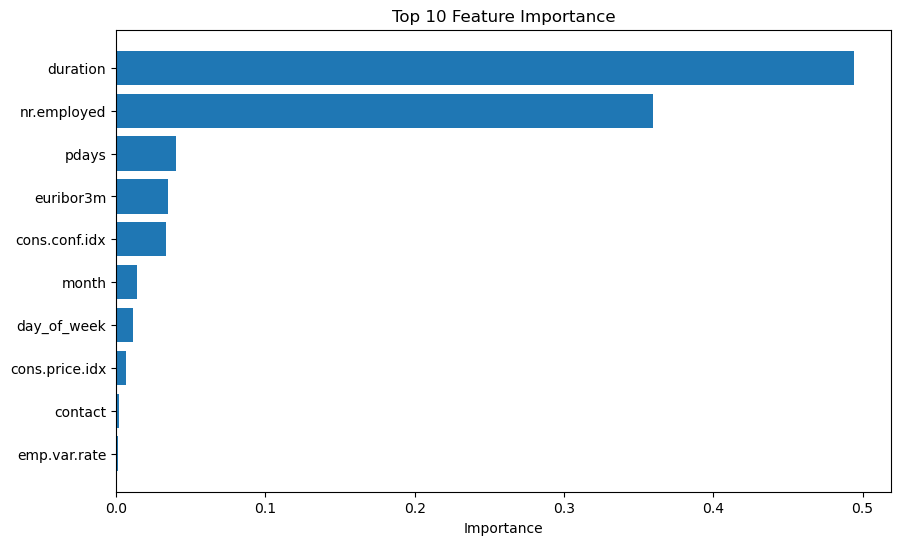

In [18]:
# Cell 15: Visualize Feature Importance
plt.figure(figsize=(10, 6))
top_features = feature_imp.head(10)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()
plt.show()


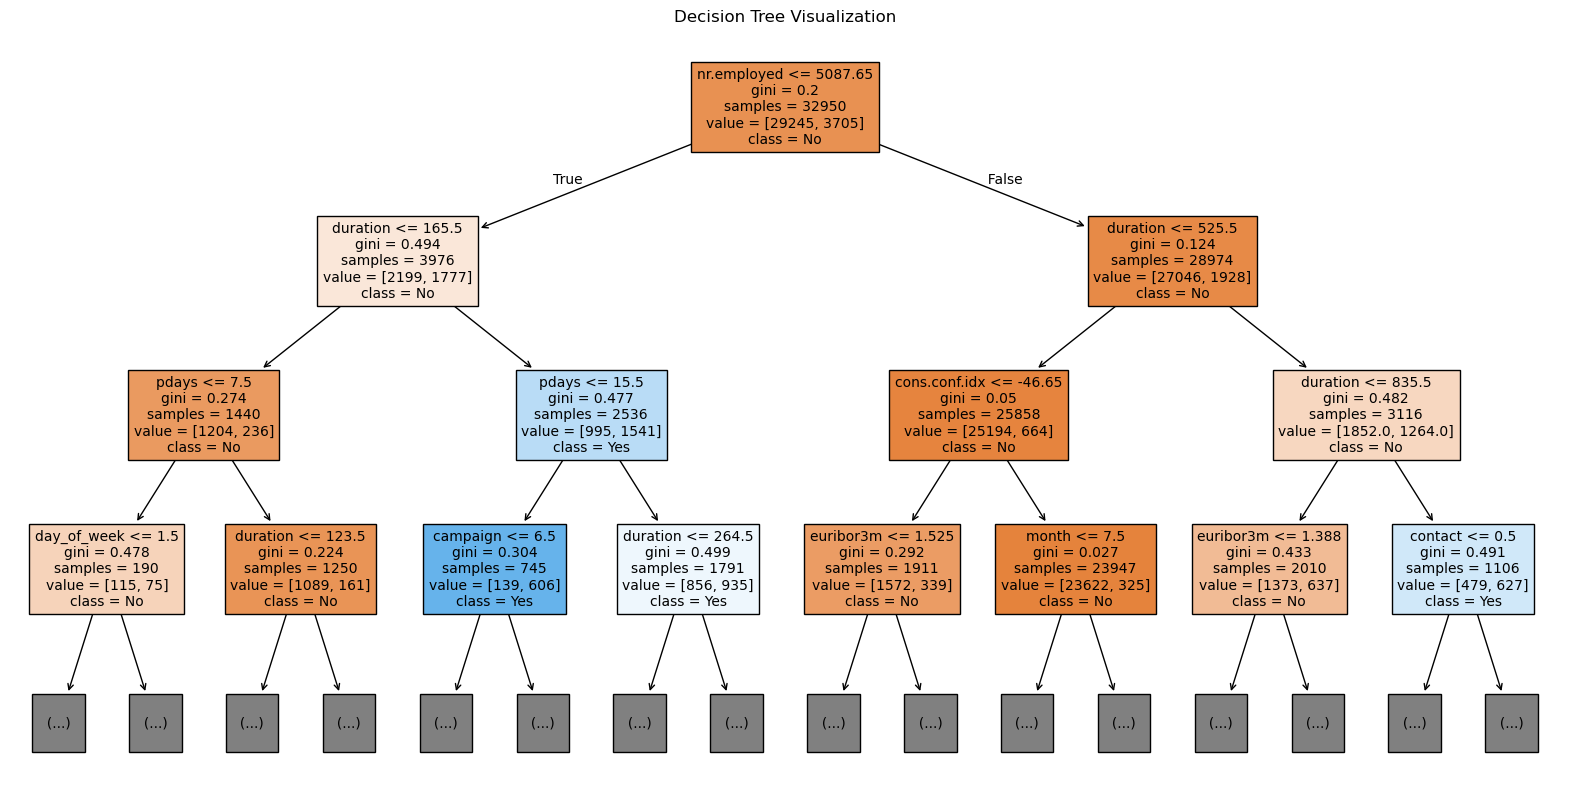

In [19]:
# Cell 16: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=X_encoded.columns,
          class_names=['No', 'Yes'],
          filled=True,
          max_depth=3,
          fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()


In [20]:
# Cell 17: Test with a sample prediction
sample = X_test.iloc[0:1]
prediction = dt_model.predict(sample)[0]
actual = y_test.iloc[0]

print(f"\nSample Prediction:")
print(f"Predicted: {prediction} ({'Yes' if prediction == 1 else 'No'})")
print(f"Actual: {actual} ({'Yes' if actual == 1 else 'No'})")



Sample Prediction:
Predicted: 0 (No)
Actual: 0 (No)


In [21]:
# Cell 18: Summary
print("\n=== Model Summary ===")
print(f"Accuracy: {test_acc:.2%}")
print(f"Most Important Feature: {feature_imp.iloc[0]['feature']}")
print(f"Tree Depth: {dt_model.get_depth()}")
print("Model completed successfully!")


=== Model Summary ===
Accuracy: 91.49%
Most Important Feature: duration
Tree Depth: 5
Model completed successfully!
